In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import matplotlib.dates as mdates
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns",None)

In [48]:
df = pd.read_csv(r"..\data\df_featured.csv")
df = df[~(df["Year"].isin([2020,2021,2022]))]
df.head(3)

,Year,Date,Audience,Result,Pitcher,GameTime,Average_Temperature (℃),Total_Precipitation (mm),Average_wind_speed(m/s),Home_Score,Away_Score,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Opponent_DeNA,Opponent_オリックス,Opponent_ヤクルト,Opponent_ロッテ,Opponent_中日,Opponent_巨人,Opponent_広島,Opponent_日本ハム,Opponent_楽天,Opponent_西武,Opponent_阪神,Is_Holiday,Match_Number,Rain_Zero_Flag,capacity,occupancy
0,2015,2015-03-27,38500,0,攝津,197,12.2,0.0,1.7,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,38530,0.999221
1,2015,2015-03-28,37397,1,スタンリッジ,157,16.1,0.0,2.2,4,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,38530,0.970594
2,2015,2015-03-29,38118,0,中田,201,16.1,0.0,2.5,4,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,1,38530,0.989307


C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


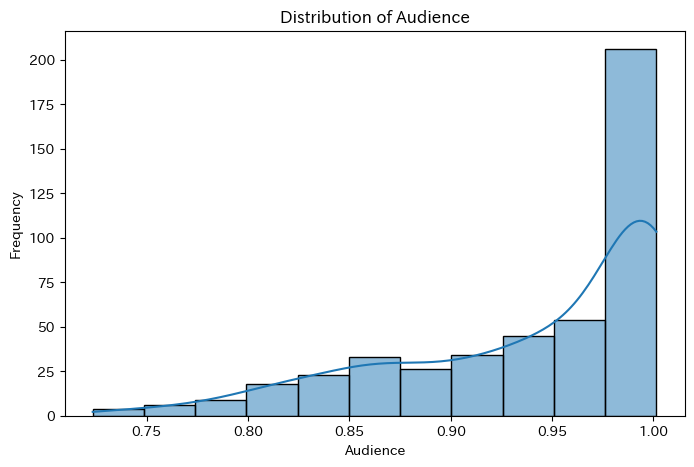

In [53]:
# 1. 観客数の分布
plt.figure(figsize=(8, 5))
sns.histplot(df['occupancy'], kde=True)
plt.title('Distribution of Audience')
plt.xlabel('Audience')
plt.ylabel('Frequency')
plt.show()

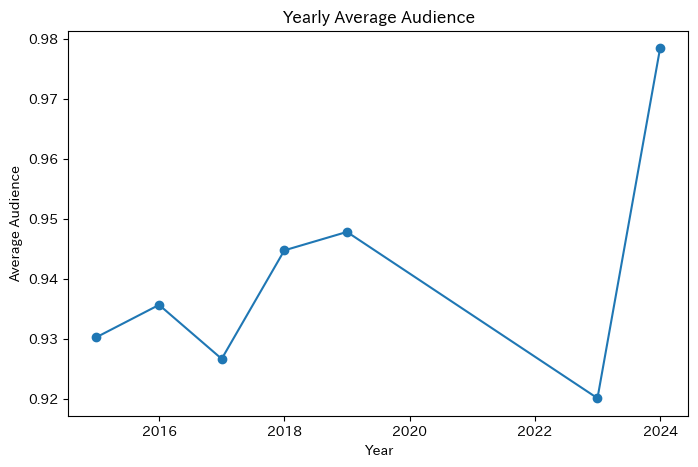

In [54]:
# 2. 年ごとの観客数の推移
plt.figure(figsize=(8, 5))
df_grouped = df.groupby('Year')['occupancy'].mean()
plt.plot(df_grouped.index, df_grouped.values, marker='o')
plt.title('Yearly Average Audience')
plt.xlabel('Year')
plt.ylabel('Average Audience')
plt.show()

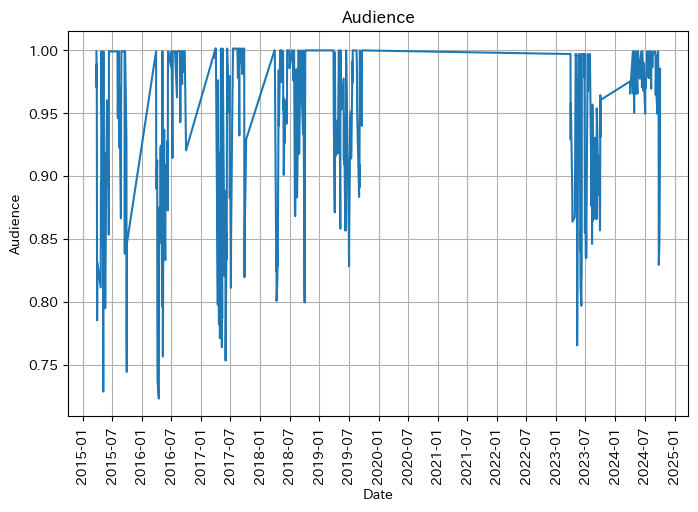

In [56]:
# 3.試合ごとの観客数の推移
# 2019年に座席の最大数が増えた

# Date列がdatetime型か確認
df["Date"] = pd.to_datetime(df["Date"])

# グラフの描画
plt.figure(figsize=(8, 5))
plt.plot(df["Date"], df['occupancy'])
plt.title('Audience')
plt.xlabel('Date')
plt.ylabel('Audience')
plt.grid()

# 横軸の日時の表示を月単位に設定
plt.gca().xaxis.set_major_locator(mdates.MonthLocator([1,7]))  # 月単位で設定
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 年-月の形式で表示

plt.xticks(rotation=90)  # x軸の日付を回転させる
plt.show()


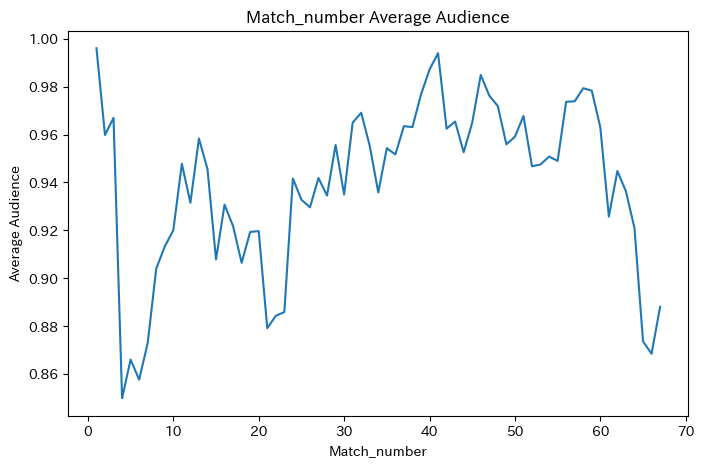

In [64]:
# 4. 何試合目かと観客数の推移
plt.figure(figsize=(8, 5))
df_grouped = df.groupby('Match_Number')['occupancy'].mean()
plt.plot(df_grouped.index,df_grouped.values)
plt.title('Match_number Average Audience')
plt.xlabel('Match_number')
plt.ylabel('Average Audience')
plt.show()


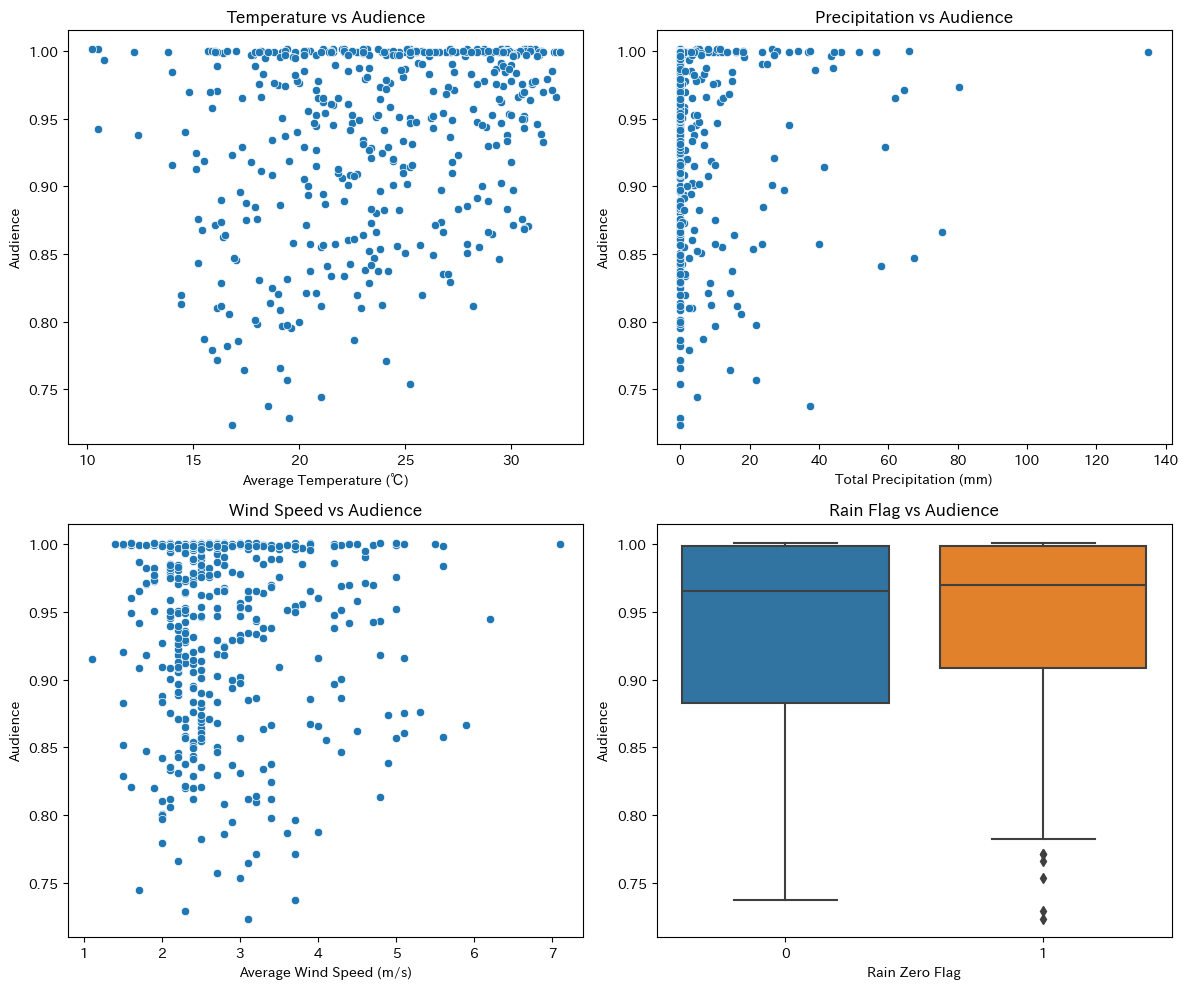

In [58]:
# 5.気象情報と観客数の関係性

# サブプロットを2行2列で設定
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1つ目の散布図: 温度と観客数
sns.scatterplot(x='Average_Temperature (℃)', y='occupancy', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Temperature vs Audience')
axes[0, 0].set_xlabel('Average Temperature (℃)')
axes[0, 0].set_ylabel('Audience')

# 2つ目の散布図: 降水量と観客数
sns.scatterplot(x='Total_Precipitation (mm)', y='occupancy', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Precipitation vs Audience')
axes[0, 1].set_xlabel('Total Precipitation (mm)')
axes[0, 1].set_ylabel('Audience')

# 3つ目の散布図: 風速と観客数
sns.scatterplot(x='Average_wind_speed(m/s)', y='occupancy', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Wind Speed vs Audience')
axes[1, 0].set_xlabel('Average Wind Speed (m/s)')
axes[1, 0].set_ylabel('Audience')

# 4つ目の散布図: 雨フラグと観客数
sns.boxplot(x='Rain_Zero_Flag', y='occupancy', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Rain Flag vs Audience')
axes[1, 1].set_xlabel('Rain Zero Flag')
axes[1, 1].set_ylabel('Audience')

# レイアウト調整
plt.tight_layout()
plt.show()

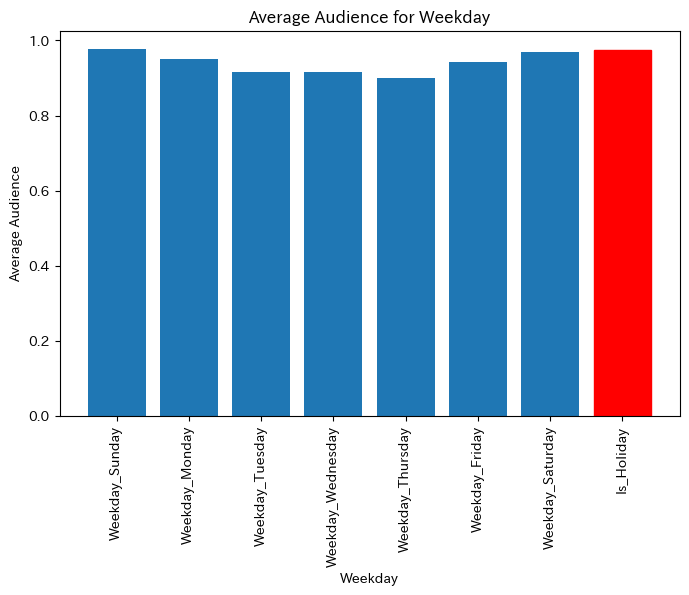

In [59]:
import matplotlib.pyplot as plt

# 週日ごとの観客数の平均値を計算
weekday_columns = [
    'Weekday_Sunday', 'Weekday_Monday', 'Weekday_Tuesday', 
    'Weekday_Wednesday', 'Weekday_Thursday', 'Weekday_Friday', 'Weekday_Saturday', 'Is_Holiday'
]

# 各コラムに対して1の観客数の平均値を計算
weekdayt_means = {
    col: df.loc[df[col] == 1, 'occupancy'].mean() for col in weekday_columns
}

# 平均値を棒グラフで可視化
fig, ax = plt.subplots(figsize=(8, 5))

# すべてのバーを描画
bars = plt.bar(weekdayt_means.keys(), weekdayt_means.values())

# Is_Holidayの棒の色を変更
for i, bar in enumerate(bars):
    if weekday_columns[i] == 'Is_Holiday':
        bar.set_color('red')  # Is_Holidayの棒の色を赤に変更

# タイトルとラベル
plt.title('Average Audience for Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Audience')

# X軸のラベルを45度回転
plt.xticks(rotation=90)

plt.show()


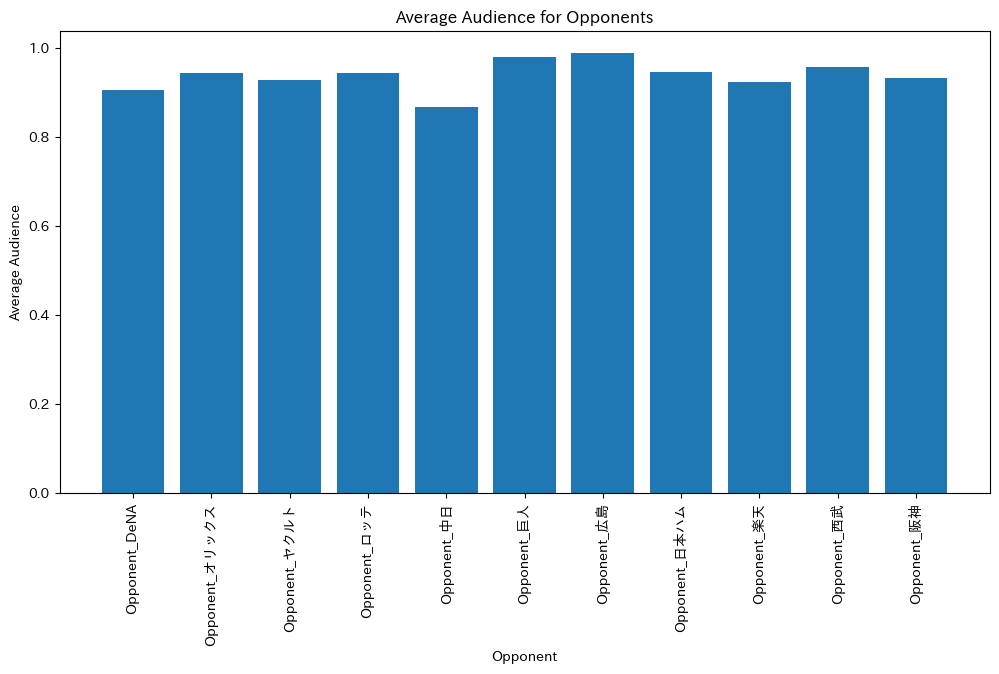

In [60]:
# 7. 対戦相手ごとの観客数
plt.figure(figsize=(12, 6))
opponent_columns = [col for col in df.columns if col.startswith('Opponent_')]

# 各コラムに対して1の観客数の平均値を計算
opponent_means = {
    col: df.loc[df[col] == 1, 'occupancy'].mean() for col in opponent_columns
}

# 平均値を棒グラフで可視化
plt.bar(opponent_means.keys(), opponent_means.values())
plt.title('Average Audience for Opponents')
plt.xlabel('Opponent')
plt.ylabel('Average Audience')
plt.xticks(rotation=90)
plt.show()


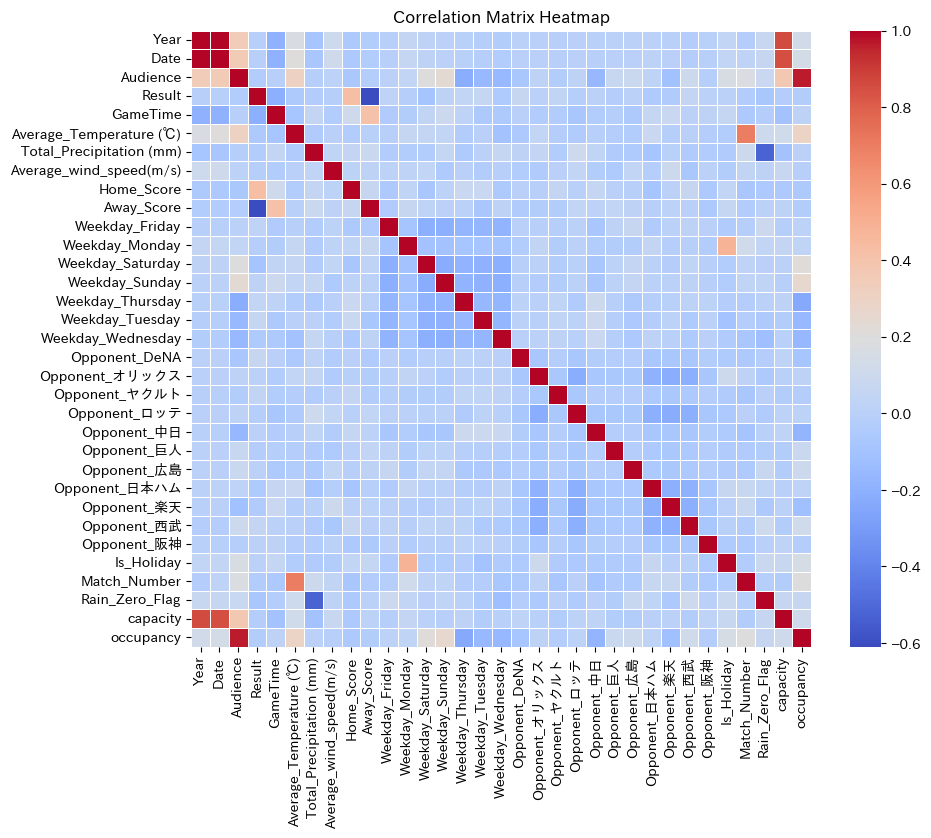

In [62]:
# 相関行列の計算
corr_matrix = df.drop(["Pitcher"],axis=1).corr()

# ヒートマップの作成
plt.figure(figsize=(10, 8))  # サイズ調整
sns.heatmap(corr_matrix,cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()